<a href="https://colab.research.google.com/github/harsha0062/ml_learning/blob/main/Random_imputation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ml -working/train.csv',usecols=['Age','Fare','Survived'])

In [ ]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [ ]:
df.isnull().mean()*100

,0
Survived,0.00000
Age,19.86532
Fare,0.00000


In [ ]:
x=df.drop(columns=['Survived'])
y=df['Survived']

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=2)

In [ ]:
x_train

,Age,Fare
30,40.0,27.7208
10,4.0,16.7000
873,47.0,9.0000
182,9.0,31.3875
876,20.0,9.8458
...,...,...
534,30.0,8.6625
584,NaN,8.7125
493,71.0,49.5042
527,NaN,221.7792


In [ ]:
x_train['Age_imputed']=x_train['Age']
x_test['Age_imputed']=x_test['Age']

In [ ]:
x_test.tail()

,Age,Fare,Age_imputed
89,24.0,8.0500,24.0
80,22.0,9.0000,22.0
846,NaN,69.5500,NaN
870,26.0,7.8958,26.0
251,29.0,10.4625,29.0


In [ ]:
# Train
mask_train = x_train['Age_imputed'].isnull()

x_train.loc[mask_train, 'Age_imputed'] = (
    x_train['Age']
    .dropna()
    .sample(mask_train.sum())
    .values
)

# Test
mask_test = x_test['Age_imputed'].isnull()

x_test.loc[mask_test, 'Age_imputed'] = (
    x_train['Age']
    .dropna()
    .sample(mask_test.sum())
    .values
)

In [ ]:
x_train['Age'].dropna().sample(x_train['Age'].isnull().sum()).values

array([60.  , 32.  , 37.  , 16.  , 54.  , 33.  , 33.  , 33.  , 30.  ,
       28.  , 63.  ,  0.75, 21.  ,  4.  , 36.  ,  9.  , 32.5 , 24.  ,
       16.  , 48.  , 23.  , 21.  , 36.  , 37.  ,  5.  , 62.  , 14.  ,
        1.  , 48.  ,  8.  , 24.  , 15.  ,  4.  , 19.  , 34.  , 38.  ,
       45.  , 31.  , 21.  ,  2.  ,  9.  , 35.  , 49.  , 45.  , 18.  ,
       25.  , 29.  , 27.  , 31.  , 21.  , 36.  , 40.  , 31.  , 19.  ,
       57.  , 32.  , 42.  , 28.  , 44.  , 26.  , 23.  , 20.  , 44.  ,
       60.  , 30.5 ,  2.  , 22.  , 28.  , 45.  , 18.  , 20.  , 22.  ,
        1.  , 16.  , 42.  , 24.  , 48.  , 41.  , 36.  , 14.  , 24.  ,
       50.  , 31.  , 28.  , 21.  , 40.  , 19.  , 35.  , 16.  , 52.  ,
       16.  , 45.5 , 36.  , 11.  , 61.  , 29.  , 16.  , 30.  , 32.  ,
       18.  ,  2.  , 31.  , 33.  , 30.  , 11.  , 13.  , 26.  , 28.  ,
       34.  ,  3.  , 14.  , 33.  , 19.  , 35.  , 28.  , 70.5 , 21.  ,
       48.  , 40.  , 44.  , 36.  , 16.  , 23.  , 34.  , 36.  , 23.  ,
       27.  , 62.  ,

In [ ]:
x_train['Age'].isnull().sum()


np.int64(148)

In [ ]:
x_train

,Age,Fare,Age_imputed
30,40.0,27.7208,40.0
10,4.0,16.7000,4.0
873,47.0,9.0000,47.0
182,9.0,31.3875,9.0
876,20.0,9.8458,20.0
...,...,...,...
534,30.0,8.6625,30.0
584,NaN,8.7125,39.0
493,71.0,49.5042,71.0
527,NaN,221.7792,25.0


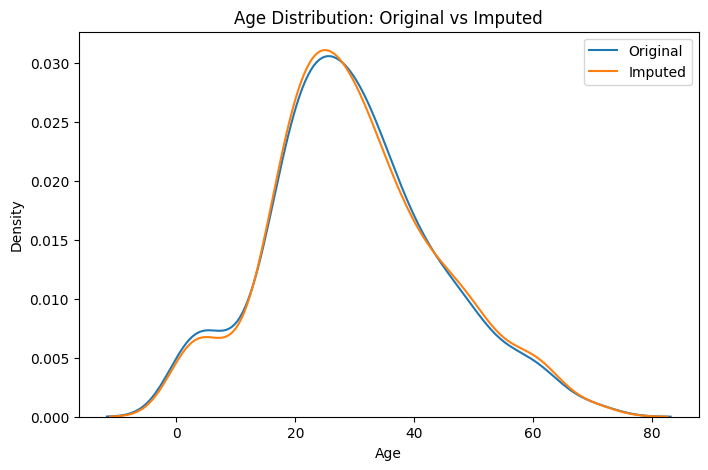

In [ ]:

plt.figure(figsize=(8,5))

sns.kdeplot(x_train['Age'], label='Original')
sns.kdeplot(x_train['Age_imputed'], label='Imputed')

plt.legend()
plt.title("Age Distribution: Original vs Imputed")
plt.show()

In [ ]:
print('Original variable varience :', x_train['Age'].var())
print('Imputed variable varience :', x_train['Age_imputed'].var())


Original variable varience : 204.3495133904614
Imputed variable varience : 205.85980085652432


In [ ]:
x_train[['Fare','Age','Age_imputed']].cov()

,Fare,Age,Age_imputed
Fare,2368.246832,71.512440,45.316435
Age,71.512440,204.349513,204.349513
Age_imputed,45.316435,204.349513,205.859801


<Axes: >

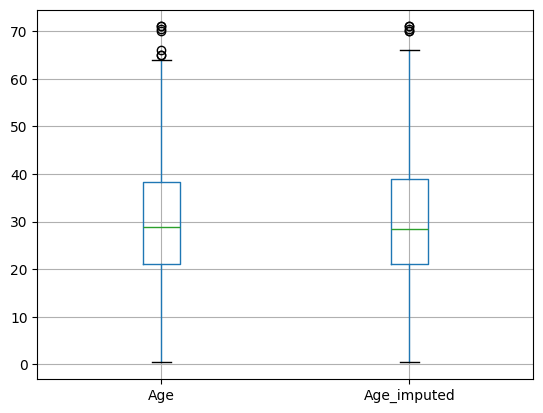

In [ ]:
x_train[['Age','Age_imputed']].boxplot()

In [ ]:
observation = x_train.iloc[0]   # pick first row

sampled_value = x_train['Age'].dropna().sample(
    1,
    random_state=int(observation['Fare'])
).iloc[0]

sampled_value

np.float64(28.0)

Using Categorical data


In [ ]:
data=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ml -working/house-train.csv',usecols=['GarageQual','FireplaceQu','SalePrice'])

In [ ]:
data.head()

,FireplaceQu,GarageQual,SalePrice
0,NaN,TA,208500
1,TA,TA,181500
2,TA,TA,223500
3,Gd,TA,140000
4,TA,TA,250000


In [ ]:
data.isnull().mean()*100


,0
FireplaceQu,47.260274
GarageQual,5.547945
SalePrice,0.000000


In [ ]:
x=data
y=data['SalePrice']

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=2)

In [ ]:
x_train['GarageQual_imputed']=x_train['GarageQual']
x_test['GarageQual_imputed']=x_test['GarageQual']

x_train['FireplaceQu_imputed']=x_train['FireplaceQu']
x_test['FireplaceQu_imputed']=x_test['FireplaceQu']
#

In [ ]:
x_train.sample(5)

,FireplaceQu,GarageQual,SalePrice,GarageQual_imputed,FireplaceQu_imputed
562,Gd,NaN,108000,NaN,Gd
416,TA,TA,149500,TA,TA
875,Gd,TA,303477,TA,Gd
539,TA,TA,272000,TA,TA
774,Gd,TA,395000,TA,Gd


In [ ]:
# Train
mask_train = x_train['GarageQual_imputed'].isnull()
x_train.loc[mask_train, 'GarageQual_imputed'] = (
    x_train['GarageQual']
    .dropna()
    .sample(mask_train.sum())
    .values
)

# Test
mask_test = x_test['GarageQual_imputed'].isnull()

x_test.loc[mask_test, 'GarageQual_imputed'] = (
    x_train['GarageQual']
    .dropna()
    .sample(mask_test.sum())
    .values
)

In [ ]:
# Train
mask_train = x_train['FireplaceQu_imputed'].isnull()
x_train.loc[mask_train, 'FireplaceQu_imputed'] = (
    x_train['FireplaceQu']
    .dropna()
    .sample(mask_train.sum())
    .values
)

# Test
mask_test = x_test['FireplaceQu_imputed'].isnull()

x_test.loc[mask_test, 'FireplaceQu_imputed'] = (
    x_train['FireplaceQu']
    .dropna()
    .sample(mask_test.sum())
    .values
)

In [ ]:
temp = pd.concat(
    [
        x_train['GarageQual'].value_counts(normalize=True),
        x_train['GarageQual_imputed'].value_counts(normalize=True)
    ],
    axis=1
)

temp.columns = ['original', 'imputed']

temp

,original,imputed
TA,0.951043,0.951199
Fa,0.037171,0.035959
Gd,0.009973,0.011130
Po,0.000907,0.000856
Ex,0.000907,0.000856


In [ ]:
temp = pd.concat(
    [
        x_train['FireplaceQu'].value_counts(normalize=True),
        x_train['FireplaceQu_imputed'].value_counts(normalize=True)
    ],
    axis=1
)

temp.columns = ['original', 'imputed']

temp

,original,imputed
Gd,0.494272,0.493151
TA,0.412439,0.413527
Fa,0.040917,0.041952
Po,0.027823,0.026541
Ex,0.024550,0.024829


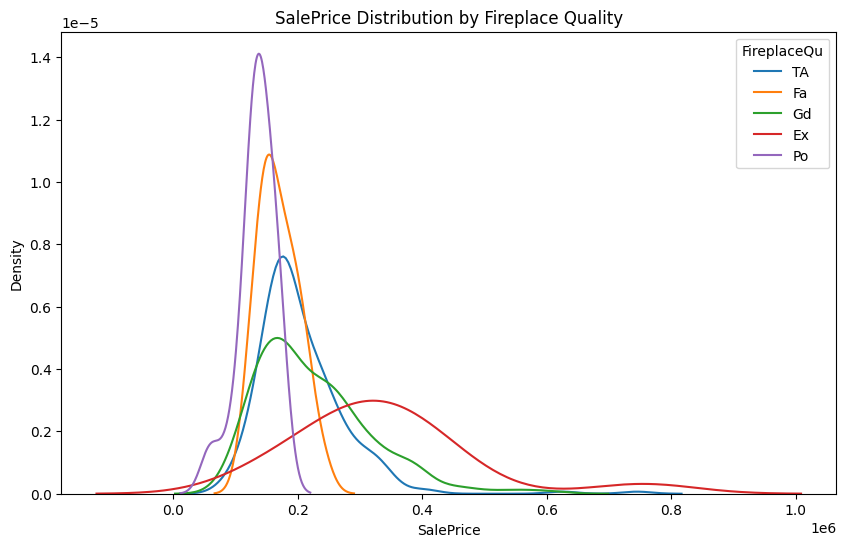

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))

for category in x_train['FireplaceQu'].dropna().unique():

    subset = x_train.loc[x_train['FireplaceQu'] == category, 'SalePrice']

    if len(subset) > 1:   # KDE needs at least 2 values
        sns.kdeplot(subset, label=category)

plt.legend(title="FireplaceQu")
plt.title("SalePrice Distribution by Fireplace Quality")
plt.xlabel("SalePrice")
plt.ylabel("Density")
plt.show()

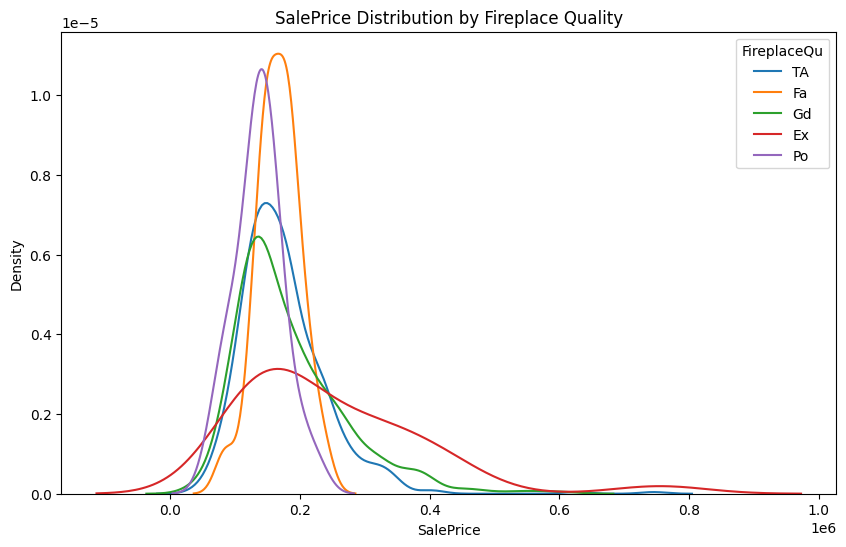

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))

for category in x_train['FireplaceQu_imputed'].dropna().unique():

    subset = x_train.loc[x_train['FireplaceQu_imputed'] == category, 'SalePrice']

    if len(subset) > 1:   # KDE needs at least 2 values
        sns.kdeplot(subset, label=category)

plt.legend(title="FireplaceQu")
plt.title("SalePrice Distribution by Fireplace Quality")
plt.xlabel("SalePrice")
plt.ylabel("Density")
plt.show()